In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_excel('Course Project - Data for Classification - Electric Vehicles.xls')
df.head()

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5,5,5,5,5,5,5,3,3,A
1,1,0,0,1,0,0,1,0,0,1,...,4,2,4,2,2,2,2,3,3,D
2,1,1,0,1,0,0,1,1,0,1,...,4,4,?,?,4,2,4,4,1,A
3,0,0,0,0,0,0,0,0,0,0,...,?,?,?,?,?,?,?,3,3,C
4,1,1,0,1,0,0,1,1,0,1,...,?,?,1,1,?,?,?,3,3,D


In [3]:

# Replace non-numeric values with NaN
df.replace('?', np.nan, inplace=True)
df.head()

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,3,A
1,1,0,0,1,0,0,1,0,0,1,...,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3,3,D
2,1,1,0,1,0,0,1,1,0,1,...,4.0,4.0,NaN,NaN,4.0,2.0,4.0,4,1,A
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,C
4,1,1,0,1,0,0,1,1,0,1,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3,3,D


In [4]:
from sklearn.impute import KNNImputer

# Assuming 'df' is your DataFrame and 'exclude_column_name' is the column to exclude
exclude_column_name = 'Q16'
column_to_exclude = df[exclude_column_name]

# Create a list of k values
k_values = [1, 3, 5, 7, 9,11,15,19]

# Loop through each k value
for k in k_values:
    # Drop the column you want to exclude
    columns_to_impute = df.drop(columns=[exclude_column_name])
    
    # Apply KNN imputation for the current k value
    imputer = KNNImputer(n_neighbors=k)
    imputed_data = imputer.fit_transform(columns_to_impute)
    
    # Use the imputed data for further processing or modeling
    # ...
    imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute.columns)
    imputed_df[exclude_column_name] = column_to_exclude

    # Example: Print imputed data shape
    print(f"Imputed data shape for k={k}: {imputed_data.shape}")


Imputed data shape for k=1: (6108, 74)
Imputed data shape for k=3: (6108, 74)
Imputed data shape for k=5: (6108, 74)
Imputed data shape for k=7: (6108, 74)
Imputed data shape for k=9: (6108, 74)
Imputed data shape for k=11: (6108, 74)
Imputed data shape for k=15: (6108, 74)
Imputed data shape for k=19: (6108, 74)


In [5]:
# Assuming 'df' is your DataFrame and 'Q16' is the column with values A, B, C, D
mapping = {'A': 0, 'B': 1, 'C': 1, 'D': 1}
imputed_df['Q16'] = imputed_df['Q16'].replace(mapping)

In [6]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(imputed_df.drop(columns=['Q16']), imputed_df['Q16'])
imputed_df = pd.concat([pd.DataFrame(X_resampled, columns=imputed_df.drop(columns=['Q16']).columns), pd.Series(y_resampled, name='Q16')], axis=1)
print(f"Imputed data shape: {imputed_df.shape}")

Imputed data shape: (6450, 75)


In [7]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
###MUTUAL INFO
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
target_column = 'Q16'
threshold = 0.01  # Set your desired correlation threshold

# Copy the DataFrame to avoid modifying the original
imputed_df_copy = imputed_df.copy()

# Use mutual_info_classif for feature selection with categorical target
X = imputed_df_copy.drop(columns=[target_column])
y = imputed_df_copy[target_column]

# Calculate mutual information between features and target
mutual_info_values = mutual_info_classif(X, y)

# Create a Series with feature names and their mutual information scores
feature_mutual_info = pd.Series(mutual_info_values, index=X.columns)

# Select features based on the mutual information threshold
selected_features = feature_mutual_info[feature_mutual_info > threshold].index.tolist()

# Rank features by mutual information scores
ranked_features = feature_mutual_info.sort_values(ascending=False)

# Display the ranked features
print("Ranked Features:")
print(ranked_features)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Print the ranked features
print("Ranked Features:")
print(ranked_features)


non_zero_features = ranked_features[ranked_features >= 0.001]

# Display non-zero features and their mutual information scores
print("Non-zero Mutual Information Scores for Features:")
print(non_zero_features)
pd.reset_option('display.max_rows')

non_zero_columns = non_zero_features.index.tolist()

# Create a new DataFrame with only the non-zero columns
new_df = imputed_df[non_zero_columns].copy()
new_df['Q16'] = imputed_df['Q16']
print(new_df.head())

Ranked Features:
Q17       0.146583
Q14       0.111837
Q18_14    0.096962
Q18_1     0.078306
Q21       0.061545
            ...   
Q12_12    0.000000
Q11_2     0.000000
Q13_10    0.000000
Q13_13    0.000000
Q11_12    0.000000
Length: 74, dtype: float64
Ranked Features:
Q17              0.146583
Q14              0.111837
Q18_14           0.096962
Q18_1            0.078306
Q21              0.061545
Q18_3            0.053025
Q18_10           0.052155
Q18_2            0.049115
Q12_14           0.044746
Q18_8            0.043379
Q18_9            0.042617
Q13_16           0.041904
Q13_2            0.032789
Q18_13           0.031458
Q18_15           0.031410
Q18_16           0.029346
Q18_4            0.029276
Q18_17           0.028748
Q13_7            0.025851
Q12_4            0.024537
Q12_5            0.023071
Q18_19           0.020898
Q18_21           0.020682
Q18_5            0.020642
Q12_10           0.020046
Q18_11           0.019234
Q18_23           0.017677
Q13_6            0.016838
Q1

In [8]:
new_df.head()
scaled_columns = new_df.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()) if pd.api.types.is_numeric_dtype(x) else x, axis=0)

# Concatenate the original DataFrame with the scaled columns
new_df = pd.concat([scaled_columns, new_df['Q16']], axis=1)

# Convert values to binary (0 or 1) based on the condition
new_df.iloc[:, :-1] = new_df.iloc[:, :-1].apply(lambda x: x.map(lambda val: 1 if pd.notna(val) and float(val) > 0.80 else 0))

# Convert to integer to make them binary
new_df.iloc[:, :-1] = new_df.iloc[:, :-1].astype(int)


new_df.head()

,Q17,Q14,Q18_14,Q18_1,Q21,Q18_3,Q18_10,Q18_2,Q12_14,Q18_8,...,Q18_18,Q13_14,Q11_9,Q13_12,Q12_6,Q12_9,Q13_8,Q12_8,Q12_Dont_Know,Q16
0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [9]:
imputed_df = new_df.copy()
imputed_df.head()

,Q17,Q14,Q18_14,Q18_1,Q21,Q18_3,Q18_10,Q18_2,Q12_14,Q18_8,...,Q18_18,Q13_14,Q11_9,Q13_12,Q12_6,Q12_9,Q13_8,Q12_8,Q12_Dont_Know,Q16
0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
exclude_column_name = 'Q16'  # Column to exclude from imputation

# Save the excluded column
column_to_exclude = df[exclude_column_name]

# Drop the column you want to exclude for imputation
columns_to_impute = df.drop(columns=[exclude_column_name])

# Impute missing values with median
imputed_data = columns_to_impute.fillna(columns_to_impute.median())

# Create a DataFrame with imputed values
imputed_df = pd.concat([imputed_data, column_to_exclude], axis=1)

# Check the shape of the imputed data
print(f"Imputed data shape: {imputed_df.shape}")

# Assuming 'df' is your DataFrame and 'Q16' is the column with values A, B, C, D
mapping = {'A': 0, 'B': 1, 'C': 1, 'D': 1}
imputed_df['Q16'] = imputed_df['Q16'].replace(mapping)

Imputed data shape: (6108, 75)


In [11]:
imputed_df.head()

,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7,Q11_8,Q11_9,Q11_10,...,Q18_17,Q18_18,Q18_19,Q18_20,Q18_21,Q18_22,Q18_23,Q20,Q21,Q16
0,0,0,0,1,1,0,0,1,0,0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,3,0
1,1,0,0,1,0,0,1,0,0,1,...,4.0,2.0,4.0,2.0,2.0,2.0,2.0,3,3,1
2,1,1,0,1,0,0,1,1,0,1,...,4.0,4.0,3.0,2.0,4.0,2.0,4.0,4,1,0
3,0,0,0,0,0,0,0,0,0,0,...,3.0,2.0,3.0,2.0,3.0,2.0,2.0,3,3,1
4,1,1,0,1,0,0,1,1,0,1,...,3.0,2.0,1.0,1.0,3.0,2.0,2.0,3,3,1


In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Assuming df is your DataFrame
target_column = 'Q16'
threshold = 0.2  # Set your desired correlation threshold

# Copy the DataFrame to avoid modifying the original
imputed_df_copy = imputed_df.copy()

# Use mutual_info_classif for feature selection with categorical target
X = imputed_df_copy.drop(columns=[target_column])
y = imputed_df_copy[target_column]

# Calculate mutual information between features and target
mutual_info_values = mutual_info_classif(X, y)

# Create a Series with feature names and their mutual information scores
feature_mutual_info = pd.Series(mutual_info_values, index=X.columns)

# Select features based on the mutual information threshold
selected_features = feature_mutual_info[feature_mutual_info > threshold].index.tolist()

# Rank features by mutual information scores
ranked_features = feature_mutual_info.sort_values(ascending=False)

# Display the ranked features
print("Ranked Features:")
print(ranked_features)

Ranked Features:
Q17       0.104973
Q14       0.097608
Q18_14    0.096402
Q21       0.069444
Q18_1     0.050695
            ...   
Q11_8     0.000000
Q11_7     0.000000
Q11_6     0.000000
Q11_4     0.000000
Q11_11    0.000000
Length: 74, dtype: float64


In [13]:
non_zero_features = ranked_features[ranked_features >0.01]

# Display non-zero features and their mutual information scores
print("Non-zero Mutual Information Scores for Features:")
print(non_zero_features)

Non-zero Mutual Information Scores for Features:
Q17              0.104973
Q14              0.097608
Q18_14           0.096402
Q21              0.069444
Q18_1            0.050695
Q13_16           0.045820
Q12_14           0.045147
Q13_2            0.031648
Q18_15           0.031285
Q18_8            0.030106
Q18_13           0.029757
Q18_3            0.027979
Q18_10           0.024918
Q18_2            0.022908
Q13_7            0.022509
Q12_1            0.021919
Q12_4            0.020744
Q13_3            0.020093
Q18_9            0.019403
Q11_5            0.019253
Q18_23           0.015993
Q18_5            0.015488
Q13_5            0.015322
Q18_19           0.015098
Q13_11           0.014456
Q13_1            0.013794
Q12_10           0.013440
Q18_17           0.013416
Q13_Dont_Know    0.012718
Q12_5            0.012341
Q18_21           0.011621
Q12_Dont_Know    0.010565
Q11_3            0.010512
Q20              0.010291
dtype: float64


In [14]:
non_zero_columns = non_zero_features.index.tolist()

# Create a new DataFrame with only the non-zero columns
new_df = imputed_df[non_zero_columns].copy()

# Verify the new DataFrame
print(new_df.head())  # Check the first few rows

   Q17  Q14  Q18_14  Q21  Q18_1  Q13_16  Q12_14  Q13_2  Q18_15  Q18_8  Q18_13  \
0  3.0  1.0     5.0    3    5.0       0       0      0     5.0    5.0     5.0   
1  3.0  3.0     4.0    3    4.0       0       0      0     2.0    3.0     2.0   
2  1.0  1.0     4.0    1    5.0       0       0      1     2.0    4.0     2.0   
3  2.0  2.0     3.0    3    4.0       1       1      0     2.0    3.0     2.0   
4  2.0  2.0     3.0    3    4.0       0       0      0     2.0    3.0     2.0   

   Q18_3  Q18_10  Q18_2  Q13_7  Q12_1  Q12_4  Q13_3  Q18_9  Q11_5  Q18_23  \
0    5.0     5.0    5.0      0      0      1      1    5.0      1     5.0   
1    2.0     3.0    3.0      0      0      1      0    3.0      0     2.0   
2    4.0     4.0    4.0      0      1      1      0    4.0      0     4.0   
3    3.0     3.0    4.0      0      0      0      0    4.0      0     2.0   
4    3.0     3.0    4.0      0      0      1      0    4.0      0     2.0   

   Q18_5  Q13_5  Q18_19  Q13_11  Q13_1  Q12_10  Q1

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler

from scipy import stats

# Özellik ve hedef değişkeni seç
X = new_df  # Feature matrix
y = imputed_df['Q16'] 



# Genişletilmiş özellik setini oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Özellikleri RobustScaler ile ölçeklendirme
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_poly)

# Veriyi train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest sınıflandırıcı oluşturun

rf_classifier = RandomForestClassifier( n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2)


# Modeli eğitin
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7750


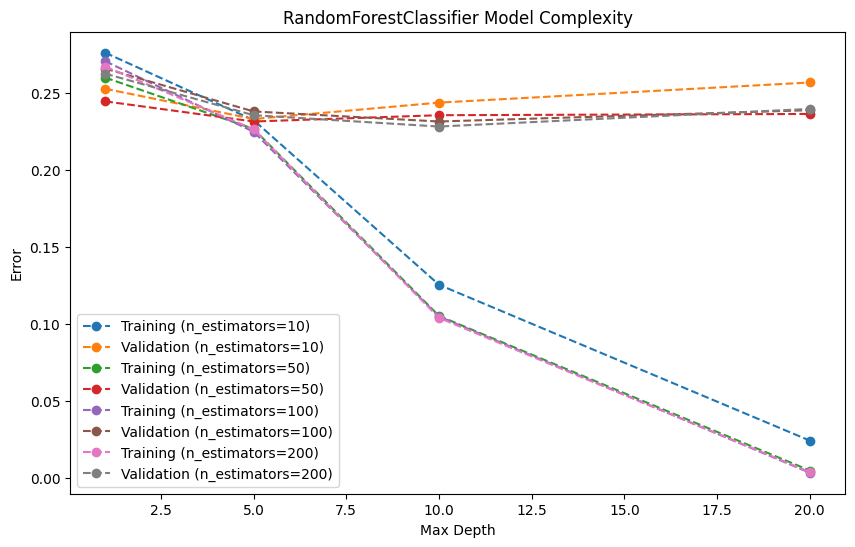

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Farklı n_estimators ve max_depth değerleri için model karmaşıklığı grafiği çiz
n_estimators_values = [10, 50, 100, 200]
max_depth_values = [1, 5, 10, 20]

train_errors = []
val_errors = []

plt.figure(figsize=(10, 6))

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # RandomForestClassifier modelini oluştur
        rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
        # Modeli eğit
        rf_clf.fit(X_train, y_train)
        
        # Eğitim setindeki hata
        y_train_pred = rf_clf.predict(X_train)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        
        # Doğrulama setindeki hata
        y_val_pred = rf_clf.predict(X_test)
        val_error = 1 - accuracy_score(y_test, y_val_pred)
        
        train_errors.append((n_estimators, max_depth, train_error))
        val_errors.append((n_estimators, max_depth, val_error))

# Eğitim hatası ve doğrulama hatası grafiğini çiz
for n_estimators in n_estimators_values:
    train_errors_n = [error[2] for error in train_errors if error[0] == n_estimators]
    val_errors_n = [error[2] for error in val_errors if error[0] == n_estimators]
    
    plt.plot(max_depth_values, train_errors_n, label=f'Training (n_estimators={n_estimators})', linestyle='dashed', marker='o')
    plt.plot(max_depth_values, val_errors_n, label=f'Validation (n_estimators={n_estimators})', linestyle='dashed', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('RandomForestClassifier Model Complexity')
plt.legend()
plt.show()


In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = new_df  # Feature matrix
y = imputed_df['Q16'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoostClassifier modeli


ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, base_estimator=RandomForestClassifier(n_estimators=50, max_depth=1))



sfm = SelectFromModel(ada_clf, threshold=-np.inf, max_features=5)  # Örneğin, 5 özellik bırakmak istiyoruz
X_train_sfm = sfm.fit_transform(X_train, y_train)

# Modeli eğitin
ada_clf.fit(X_train_sfm, y_train)

# Test seti üzerinde tahminler yapın
X_test_sfm = sfm.transform(X_test)
y_pred = ada_clf.predict(X_test_sfm)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

C:\Users\dilav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\dilav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Accuracy: 0.7700


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats
# Özellik ve hedef değişkeni seç
X = new_df  # Feature matrix
y = imputed_df['Q16'] 


# Sabit özellikleri çıkar

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
# Önceden oluşturulmuş genişletilmiş özellik setini ve hedef değişkeni kullanarak veri setini oluşturun
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Random Forest sınıflandırıcı oluşturun
rf_classifier = RandomForestClassifier(n_estimators=100, base_estimator=RandomForestClassifier(n_estimators=50, max_depth=1))


# Modeli eğitin
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

# Model oluşturma
model = models.Sequential()
model.add(layers.Dense(units=128, activation='relu', input_shape=(X_train_balanced.shape[1],)))
model.add(layers.Dense(units=256, activation='relu'))  # Increase units
model.add(layers.Dense(units=128, activation='relu'))  # Add more layers
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))


# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Test seti üzerinde modelin performansını değerlendirme
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

In [ ]:
""""from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from scipy import stats
import numpy as np

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

# Aykırı değerleri ele //
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Check if there are samples remaining after removing outliers
if X.shape[0] > 0:
    # Genişletilmiş özellik setini oluştur
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Özellikleri RobustScaler ile ölçeklendirme
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X_poly)

    # Veriyi train ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Create RandomForestClassifier with the best parameters
    rf_classifier = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

    # Modeli eğitin
    rf_classifier.fit(X_train, y_train)

    # Test seti üzerinde tahminler yapın
    y_pred = rf_classifier.predict(X_test)

    # Doğruluk skorunu değerlendirin
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
else:
    print("No samples remaining after removing outliers.")"""


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from scipy import stats

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']



# Genişletilmiş özellik setini oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Özellikleri RobustScaler ile ölçeklendirme
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_poly)

# Veriyi train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Create RandomForestClassifier with the best parameters
rf_classifier = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 200)

# Modeli eğitin
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler

from scipy import stats

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']


z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

# Genişletilmiş özellik setini oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Özellikleri RobustScaler ile ölçeklendirme
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_poly)

# Veriyi train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest sınıflandırıcı oluşturun
rf_classifier = RandomForestClassifier()

# Modeli eğitin
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


In [ ]:
"""from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# Kullanılacak sınıflandırıcı modelleri
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'QDA': QuadraticDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier()
}

# Her bir sınıflandırıcı modeli için RFE uygulayarak doğruluk skorlarını ölçün
for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name} with RFE:")
    
    # RFE'yi kullanarak özellik seçimi yapın
    rfe = RFE(clf, n_features_to_select=5)  # Örneğin, 5 özellik bırakmak istiyoruz
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    
    # Modeli eğitin
    clf.fit(X_train_rfe, y_train)
    
    # Test seti üzerinde tahminler yapın
    X_test_rfe = rfe.transform(X_test)
    y_pred = clf.predict(X_test_rfe)
    
    # Doğruluk skorunu değerlendirin
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")
    print("-------------------------------------------")
"""


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats
# Örnek veri setini oluştur
# imputed_df'yi veri setiniz olarak kullanın

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']


"""z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
new_X = X[filtered_entries]
new_y = y[filtered_entries]"""

# Özellik seçimi: Pearson korelasyon katsayısı ile en iyi k özelliği seç
k_best_features = 2
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = feature_selector.fit_transform(X, y)

# Veriyi standartlaştır
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Decision Tree modelini tanımla
dt_model = DecisionTreeClassifier(random_state=42)

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(dt_model, X_selected_standardized, y, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

X = X.loc[:, X.apply(pd.Series.nunique) != 1]
# Özellik seçimi: Pearson korelasyon katsayısı ile en iyi k özelliği seç
k_best_features = 5
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = feature_selector.fit_transform(X, y)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Veriyi standartlaştır
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# KNN modelini tanımla
knn_model = KNeighborsClassifier(n_neighbors=5)

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(knn_model, X_selected_standardized, y, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

X = X.loc[:, X.apply(pd.Series.nunique) != 1]
# Özellik seçimi: Pearson korelasyon katsayısı ile en iyi k özelliği seç
k_best_features = 5
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = feature_selector.fit_transform(X, y)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Veriyi standartlaştır
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Logistik Regresyon modelini tanımla
logreg_model = LogisticRegression(random_state=42)

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(logreg_model, X_selected_standardized, y, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

X = X.loc[:, X.apply(pd.Series.nunique) != 1]

# Özellik seçimi: Pearson korelasyon katsayısı ile en iyi k özelliği seç
k_best_features = 8
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = feature_selector.fit_transform(X, y)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Veriyi standartlaştır
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Gradient Boosting modelini tanımla
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(gb_model, X_selected_standardized, y, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

X = X.loc[:, X.apply(pd.Series.nunique) != 1]
# Özellik seçimi: Pearson korelasyon katsayısı ile en iyi k özelliği seç
k_best_features = 20
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = feature_selector.fit_transform(X, y)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Veriyi standartlaştır
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# Random Forest modelini tanımla
rf_model = RandomForestClassifier(random_state=42)

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(rf_model, X_selected_standardized, y, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']



# Özellik seçimi: Pearson korelasyon katsayısı ile en iyi k özelliği seç
k_best_features = 2
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_selected = feature_selector.fit_transform(X, y)

# Eğitim ve test setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Veriyi standartlaştır
scaler = StandardScaler()
X_selected_standardized = scaler.fit_transform(X_selected)

# SVM modelini tanımla
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(svm_model, X_selected_standardized, y, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygula
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanalım
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVM modelini tanımla
svm_model = SVC()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(svm_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygula
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanalım
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Neural Networks modelini tanımla
nn_model = MLPClassifier(max_iter=1000)  # max_iter parametresi artırılabilir

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(nn_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygula
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanalım
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Random Forest modelini tanımla
rf_model = RandomForestClassifier()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygula
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanalım
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Decision Tree modelini tanımla
dt_model = DecisionTreeClassifier()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(dt_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygula
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanalım
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# K-Nearest Neighbors modelini tanımla
knn_model = KNeighborsClassifier()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(knn_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]
# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PCA uygula
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanalım
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Naive Bayes modelini tanımla
nb_model = GaussianNB()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(nb_model, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']
# Daha sonra k-means işlemlerine devam edebilirsiniz
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Elde edilen kümeleme sonuçlarını yeni bir özellik olarak ekleyin
X_with_clusters = pd.concat([pd.DataFrame(X), pd.DataFrame({'Cluster': y_kmeans})], axis=1)

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X_with_clusters, y, test_size=0.2, random_state=42)

# Logistic Regression modelini tanımla
logistic_regression = LogisticRegression()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = cv_scores.mean()

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Öncelikle veriyi standartlaştırın (PCA için önemlidir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA ile boyut azaltma
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanmak istiyoruz
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear SVM modelini tanımla
svm_classifier = SVC(kernel='linear')

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(svm_classifier, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = cv_scores.mean()

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Öncelikle veriyi standartlaştırın (PCA için önemlidir)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA ile boyut azaltma
pca = PCA(n_components=5)  # Örneğin, 5 bileşen kullanmak istiyoruz
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression modelini tanımla
logreg = LogisticRegression()

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(logreg, X_train_pca, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = cv_scores.mean()

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)



In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli
logreg = LogisticRegression(max_iter=1000)

# RFECV'yi kullanarak özellik seçimi yapın
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')  # cv=5, 5-fold cross-validation kullanıyoruz
X_train_rfecv = rfecv.fit_transform(X_train, y_train)

# Modeli eğitin
logreg.fit(X_train_rfecv, y_train)

# Test seti üzerinde tahminler yapın
X_test_rfecv = rfecv.transform(X_test)
y_pred = logreg.predict(X_test_rfecv)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy with RFECV: {accuracy:.4f}")

# Modelin performansını 5 katlı çapraz doğrulama ile değerlendirin
cv_scores = cross_val_score(logreg, X_train_rfecv, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = cv_scores.mean()

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli
logreg = LogisticRegression(max_iter=1000)

# RFECV'yi kullanarak özellik seçimi yapın
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')  # cv=5, 5-fold cross-validation kullanıyoruz
X_train_rfecv = rfecv.fit_transform(X_train, y_train)

# Modeli eğitin
logreg.fit(X_train_rfecv, y_train)

# Test seti üzerinde tahminler yapın
X_test_rfecv = rfecv.transform(X_test)
y_pred = logreg.predict(X_test_rfecv)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy with RFECV: {accuracy:.4f}")


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]
# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli
logreg = LogisticRegression(max_iter=1000)

# RFE'yi kullanarak özellik seçimi yapın
rfe = RFE(logreg, n_features_to_select=5)  # Örneğin, 5 özellik bırakmak istiyoruz
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Modeli eğitin
logreg.fit(X_train_rfe, y_train)

# Test seti üzerinde tahminler yapın
X_test_rfe = rfe.transform(X_test)
y_pred = logreg.predict(X_test_rfe)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

# Modelin performansını 5 katlı çapraz doğrulama ile değerlendirin
cv_scores = cross_val_score(logreg, X_train_rfe, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = cv_scores.mean()

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]
# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli
logreg = LogisticRegression(max_iter=1000)

# RFE'yi kullanarak özellik seçimi yapın
rfe = RFE(logreg, n_features_to_select=5)  # Örneğin, 5 özellik bırakmak istiyoruz
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Modeli eğitin
logreg.fit(X_train_rfe, y_train)

# Test seti üzerinde tahminler yapın
X_test_rfe = rfe.transform(X_test)
y_pred = logreg.predict(X_test_rfe)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]
# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoostClassifier modeli
ada_clf = AdaBoostClassifier()

# SelectFromModel kullanarak özellik seçimi yapın
sfm = SelectFromModel(ada_clf, threshold=-np.inf, max_features=5)  # Örneğin, 5 özellik bırakmak istiyoruz
X_train_sfm = sfm.fit_transform(X_train, y_train)

# Modeli eğitin
ada_clf.fit(X_train_sfm, y_train)

# Test seti üzerinde tahminler yapın
X_test_sfm = sfm.transform(X_test)
y_pred = ada_clf.predict(X_test_sfm)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Modelin performansını 5 katlı çapraz doğrulama ile değerlendirin
cv_scores = cross_val_score(ada_clf, X_train_sfm, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = cv_scores.mean()

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]
# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoostClassifier modeli
ada_clf = AdaBoostClassifier()

# SelectFromModel kullanarak özellik seçimi yapın
sfm = SelectFromModel(ada_clf, threshold=-np.inf, max_features=5)  # Örneğin, 5 özellik bırakmak istiyoruz
X_train_sfm = sfm.fit_transform(X_train, y_train)

# Modeli eğitin
ada_clf.fit(X_train_sfm, y_train)

# Test seti üzerinde tahminler yapın
X_test_sfm = sfm.transform(X_test)
y_pred = ada_clf.predict(X_test_sfm)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")




In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örneğin, new_X ve new_y'yi kullanalım
from scipy import stats
# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]
# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modeli
clf = GradientBoostingClassifier()

# RFE'yi kullanarak özellik seçimi yapın
rfe = RFE(clf, n_features_to_select=5)  # Örneğin, 5 özellik bırakmak istiyoruz
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Modeli eğitin
clf.fit(X_train_rfe, y_train)

# Test seti üzerinde tahminler yapın
X_test_rfe = rfe.transform(X_test)
y_pred = clf.predict(X_test_rfe)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Modelin performansını 5 katlı çapraz doğrulama ile değerlendirin
cv_scores = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)




In [ ]:
"""from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from itertools import combinations

def kendall_tau(y_true, y_pred):
    concordant_pairs = 0
    discordant_pairs = 0

    n = len(y_true)

    for i, j in combinations(range(n), 2):
        # İki çiftin sıralama durumunu kontrol et
        pred_order_diff = np.sign(y_pred[i] - y_pred[j])
        true_order_diff = np.sign(y_true[i] - y_true[j])

        # Concordant veya discordant durumu kontrol et
        if pred_order_diff == true_order_diff:
            concordant_pairs += 1
        else:
            discordant_pairs += 1

    # Paydan sıfır ise nan döndür
    if (concordant_pairs + discordant_pairs) == 0:
        return np.nan

    # Kendall Tau Korelasyonu hesapla
    tau = (concordant_pairs - discordant_pairs) / np.sqrt((concordant_pairs + discordant_pairs) * n * (n - 1) / 2)

    return tau



# Önceden belirlenmiş X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

# StratifiedKFold ile 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Rank-SVM modelini tanımla
rank_svm_model = SVC(kernel='linear')

# Feature selection için SelectKBest ve f_classif kullan
k_best_features = 5
feature_selector = SelectKBest(score_func=f_classif, k=k_best_features)

# 5-fold cross-validation ile modelin performansını değerlendir
cv_kendall_tau_scores = cross_val_score(rank_svm_model, X, y, cv=cv, scoring=make_scorer(kendall_tau, greater_is_better=True))
cv_accuracy_scores = cross_val_score(rank_svm_model, X, y, cv=cv, scoring='accuracy')

# Her bir çapraz doğrulama seti için skorları yazdır
for i, (kendall_tau, accuracy) in enumerate(zip(cv_kendall_tau_scores, cv_accuracy_scores), start=1):
    print(f"Çapraz Doğrulama Seti {i}: Kendall Tau Korelasyonu = {kendall_tau:.4f}, Accuracy = {accuracy:.4f}")

# Ortalama skorları hesapla
mean_kendall_tau = np.mean(cv_kendall_tau_scores)
mean_accuracy = np.mean(cv_accuracy_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Kendall Tau Korelasyonu:", mean_kendall_tau)
print("5 Katlı Çapraz Doğrulama İle Ortalama Accuracy:", mean_accuracy)"""


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Yeni_X ve yeni_y verilerini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# RandomForestClassifier'ı sınıf ağırlıklarıyla oluşturun
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Modeli eğitin
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")



In [ ]:
"""from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Önceden belirlenmiş olan X ve y'yi kullanalım
# X: Özellik matrisi, y: Hedef değişken
# Örnek olarak, new_X ve new_y'yi kullanalım
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# SMOTE'u kullanarak oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# RandomForestClassifier'ı sınıf ağırlıklarıyla oluşturun
rf_classifier = RandomForestClassifier(random_state=42)

# Modeli eğitin
rf_classifier.fit(X_resampled, y_resampled)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")"""


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

# Z puanlarına dayalı olarak aykırı değerleri ele
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

# Genişletilmiş özellik setini oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Random Forest sınıflandırıcı oluşturun
rf_classifier = RandomForestClassifier()

# 5-fold çapraz doğrulama için StratifiedKFold kullanın
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Genişletilmiş özellik seti ve hedef değişkeni ile bir pipeline oluşturun
model = make_pipeline(PolynomialFeatures(degree=2), RandomForestClassifier())

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
from scipy import stats
import pandas as pd

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

# Aykırı değerleri ele
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

# Genişletilmiş özellik setini oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Random Forest sınıflandırıcı oluşturun
rf_classifier = RandomForestClassifier()

# Parametre aralığını belirle
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

# Pipeline ve GridSearchCV kullanarak en iyi parametreleri bulun
model = make_pipeline(PolynomialFeatures(degree=2), RandomForestClassifier())
grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
grid_search.fit(X, y)

# En iyi parametreleri görüntüleme
print("En iyi parametreler:", grid_search.best_params_)

# En iyi modeli kullanma
best_model = grid_search.best_estimator_

# 5 katlı çapraz doğrulama ile doğruluk skorlarını al
cv_scores = cross_val_score(best_model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')

# Her bir çapraz doğrulama seti için doğruluk skorlarını yazdır
for i, score in enumerate(cv_scores, start=1):
    print(f"Çapraz Doğrulama Seti {i}: Doğruluk = {score}")

# Ortalama doğruluk skorunu hesapla
mean_accuracy = np.mean(cv_scores)

print("\n5 Katlı Çapraz Doğrulama İle Ortalama Doğruluk:", mean_accuracy)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler

from scipy import stats

# Özellik ve hedef değişkeni seç
X = imputed_df.drop('Q16', axis=1)
y = imputed_df['Q16']

# Aykırı değerleri ele
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X = X[filtered_entries]
y = y[filtered_entries]

# Sabit özellikleri çıkar
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

# Genişletilmiş özellik setini oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Özellikleri RobustScaler ile ölçeklendirme
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_poly)

# Veriyi train ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest sınıflandırıcı oluşturun
rf_classifier = RandomForestClassifier()

# Modeli eğitin
rf_classifier.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = rf_classifier.predict(X_test)

# Doğruluk skorunu değerlendirin
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
